In [1]:
!pip install xgboost lightgbm skimpy imbalanced-learn optuna plotly rdkit shap causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 137.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.tsa.api as ts
import scipy
import math
import skimpy as sk
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors


from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.pipeline import Pipeline

import joblib

In [3]:
train_df = pd.read_csv('train (3).csv')
test_df = pd.read_csv('test (7).csv')

In [4]:
train_df.isnull().sum()

id           0
SMILES       0
Tm           0
Group 1      0
Group 2      0
            ..
Group 420    0
Group 421    0
Group 422    0
Group 423    0
Group 424    0
Length: 427, dtype: int64

In [5]:
test_df

,id,SMILES,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,1022,CCOC(=O)c1ccc(O)cc1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1146,CCCCCCc1ccc(O)cc1O,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,ClCBr,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2279,C=CCCCCCCCC,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1342,Fc1ccc(cc1)C(F)(F)F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2663,CCCCCCCCC(=O)CC,2,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
662,624,COc1ccc(COC(=O)C)cc1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
663,2655,C#CCCC(C)C,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,2089,BrCC(Br)C(Br)C,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,707,ClCCBr,256.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,1573,N#CC(Cl)(Cl)Cl,231.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,1634,Cc1ccc2c(C)cccc2c1,256.25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,3022,CCC(=O)c1ccc2ccccc2c1,333.15,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
sk.skim(train_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2662   │ │ int64       │ 425   │                                                          │
│ │ Number of columns │ 427    │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column      ┃ NA  ┃ NA %  ┃ mean        ┃ sd        ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │     id      │   0 │     0 │        1653 │       955 │      1 │  830.2 │   1642 │   2470 │   3328 │ ██████  │  │
│ │     Tm      │   0 │     0 │       278.3 │     85.12 │  53.54 │    217 │  277.3 │  325.1 │  897.1 │   ▂█▂   │  │
│ │   Group 1   │   0 │     0 │       1.021 │     1.354 │      0 │      0 │      1 │      2 │     16 │   █▁    │  │
│ │   Group 2   │   0 │     0 │       1.582 │     3.738 │      0 │      0 │      0 │      1 │     42 │    █    │  │
│ │   Group 3   │   0 │     0 │       0.115 │     0.426 │      0 │      0 │      0 │      0 │      6 │   █▁    │  │
│ │   Group 4   │   0 │     0 │     0.03644 │    0.2083 │      0 │      0 │      0 │      0 │      3 │    █    │  │
│ │   Group 5   │   0 │     0 │     0.03681 │    0.2055 │      0 │      0 │      0 │      0 │      2 │    █    │  │
│ │   Group 6   │   0 │     0 │     0.02292 │     0.164 │      0 │      0 │      0 │      0 │      2 │    █    │  │
│ │   Group 7   │   0 │     0 │     0.01352 │    0.1187 │      0 │      0 │      0 │      0 │      2 │    █    │  │
│ │   Group 8   │   0 │     0 │     0.01014 │    0.1175 │      0 │      0 │      0 │      0 │      2 │    █    │  │
│ │   Group 9   │   0 │     0 │    0.007137 │    0.0927 │      0 │      0 │      0 │      0 │      2 │    █    │  │
│ │  Group 10   │   0 │     0 │   0.0007513 │    0.0274 │      0 │      0 │      0 │      0 │      1 │    █    │  │
│ │  Group 11   │   0 │     0 │   0.0003757 │   0.01938 │      0 │      0 │      0 │      0 │      1 │    █    │  │
│ │  Group 12   │   0 │     0 │           0 │         0 │      0 │      0 │      0 │      0 │      0 │     █   │  │
│ │  Group 13   │   0 │     0 │     0.01165 │    0.1173 │      0 │      0 │      0 │      0 │      2 │    █    │  │
│ │  Group 14   │   0 │     0 │    0.006386 │   0.07967 │      0 │      0 │      0 │      0 │      1 │    █    │  │
│ │  Group 15   │   0 │     0 │       2.332 │     3.093 │      0 │      0 │      0 │      4 │     20 │   █▃▁   │  │
│ │  Group 16   │   0 │     0 │      0.1315 │    0.6528 │      0 │      0 │      0 │      0 │     12 │    █    │  │
│ │  Group 17   │   0 │     0 │     0.06687 │    0.4283 │      0 │      0 │      0 │      0 │      4 │    █    │  │
│ │  Group 18   │   0 │     0 │      0.1037 │    0.4341 │      0 │      0 │      0 │      0 │      6 │    █    │  │
│ │  Group 19   │   0 │     0 │     0.05973 │    0.2924 │      0 │      0 │      0 │      0 │      3 │    █    │  │
│ │  Group 20   │   0 │     0 │      0.1867 │    0.5777 

# EDA

/tmp/ipython-input-1978968680.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Tm'])


<Axes: xlabel='Tm', ylabel='Density'>

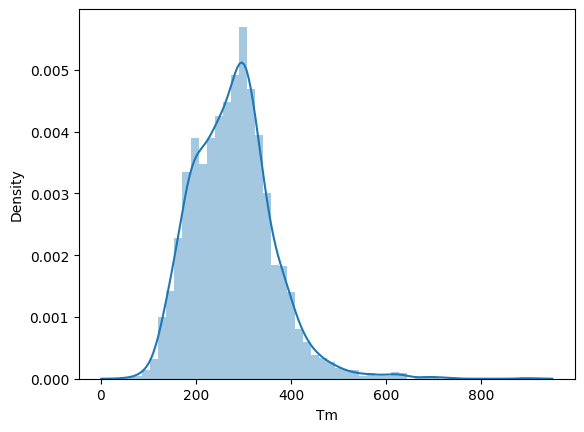

In [8]:
#Temperature Distribution
sns.distplot(train_df['Tm'])


<Axes: xlabel='Tm', ylabel='Count'>

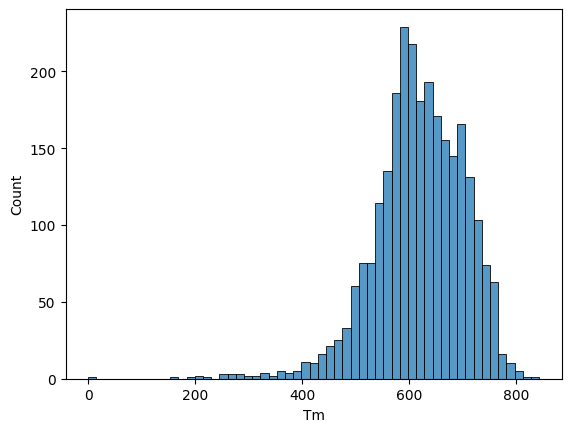

In [9]:
#Histogram of Temperature Intensity
sns.histplot(train_df['Tm'].max()-train_df['Tm'])



## Feature Engineering

In [10]:
def featurize_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    return {
        "MolWt": Descriptors.MolWt(mol),
        "LogP": Descriptors.MolLogP(mol),
        "NumHDonors": Descriptors.NumHDonors(mol),
        "NumHAcceptors": Descriptors.NumHAcceptors(mol),
        "TPSA": Descriptors.TPSA(mol),
        "NumRotatableBonds": Descriptors.NumRotatableBonds(mol),
        "NumAromaticRings": rdMolDescriptors.CalcNumAromaticRings(mol),
        "NumAliphaticRings": rdMolDescriptors.CalcNumAliphaticRings(mol),
        "RingCount": Descriptors.RingCount(mol),
        "FractionCSP3": rdMolDescriptors.CalcFractionCSP3(mol),
        "HeavyAtomCount": Descriptors.HeavyAtomCount(mol),
        "NHOHCount": Descriptors.NHOHCount(mol),
        "NOCount": Descriptors.NOCount(mol),
        "NumValenceElectrons": Descriptors.NumValenceElectrons(mol),
        "BalabanJ": Descriptors.BalabanJ(mol),
        "Chi0": Descriptors.Chi0(mol),
        "Chi1": Descriptors.Chi1(mol),
        "Kappa1": Descriptors.Kappa1(mol),
        "Kappa2": Descriptors.Kappa2(mol),
        "LabuteASA": rdMolDescriptors.CalcLabuteASA(mol),
    }

In [11]:
features = train_df["SMILES"].apply(featurize_smiles)
feat_df = pd.DataFrame(features.tolist())
train_df = pd.concat([train_df, feat_df], axis=1)

In [12]:
train_df

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,HeavyAtomCount,NHOHCount,NOCount,NumValenceElectrons,BalabanJ,Chi0,Chi1,Kappa1,Kappa2,LabuteASA
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,10,0,0,58,3.097075,8.154701,4.315384,7.427296,1.486106,51.131856
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,17,1,1,80,2.384228,11.242276,8.432653,8.824469,3.109248,98.685557
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,12,0,2,62,2.812817,8.552042,5.825699,7.345075,2.626943,71.846674
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,6,1,2,32,3.498225,4.991564,2.770056,5.030000,2.278139,35.789059
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,7,0,0,44,2.678258,5.698671,3.270056,7.350000,4.507480,51.719028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,707,ClCCBr,256.45,0,1,0,0,0,0,0,...,4,0,0,26,1.974745,3.414214,1.914214,4.770000,3.770000,39.275007
2658,1573,N#CC(Cl)(Cl)Cl,231.15,0,0,0,0,0,0,0,...,6,0,1,34,3.552734,5.207107,2.560660,6.360000,1.880971,50.406572
2659,1634,Cc1ccc2c(C)cccc2c1,256.25,0,0,0,0,0,0,0,...,12,0,0,60,2.863026,8.552042,5.770857,7.354540,2.632554,72.842952
2660,3022,CCC(=O)c1ccc2ccccc2c1,333.15,1,1,0,0,0,0,0,...,14,0,1,70,2.564317,9.966255,6.808862,8.945978,3.623261,83.369416


In [13]:
#Deleting rubbish
group_cols = train_df.filter(like="Group ").columns
print(len(group_cols))
train_df = train_df.drop(group_cols, axis=1)

424


In [14]:
print(train_df)

        id                       SMILES      Tm    MolWt     LogP  NumHDonors  \
0     2175        FC1=C(F)C(F)(F)C1(F)F  213.15  162.032  2.42120           0   
1     1222  c1ccc2c(c1)ccc3Nc4ccccc4c23  407.15  217.271  4.47430           1   
2     2994          CCN1C(C)=Nc2ccccc12  324.15  160.220  2.36462           0   
3     1704                   CC#CC(=O)O  351.15   84.074  0.09430           1   
4     2526                    CCCCC(S)C  126.15  118.245  2.49490           1   
...    ...                          ...     ...      ...      ...         ...   
2657   707                       ClCCBr  256.45  143.411  1.62010           0   
2658  1573               N#CC(Cl)(Cl)Cl  231.15  144.388  1.88018           0   
2659  1634           Cc1ccc2c(C)cccc2c1  256.25  156.228  3.45664           0   
2660  3022        CCC(=O)c1ccc2ccccc2c1  333.15  184.238  3.43250           0   
2661  1673            Brc1ccc(cc1)N(C)C  328.15  200.079  2.51510           0   

      NumHAcceptors   TPSA 

In [15]:
#Applying Feature Engineering on The Testing Set too
test_features = test_df["SMILES"].apply(featurize_smiles)
test_feat_df = pd.DataFrame(test_features.tolist())
test_df = pd.concat([test_df, test_feat_df], axis=1)
test_df = test_df.drop(columns=["id", "SMILES"], axis=0)

test_group_cols = test_df.filter(like="Group ").columns
test_df = test_df.drop(test_group_cols, axis=1)

test_df

,MolWt,LogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,NumAromaticRings,NumAliphaticRings,RingCount,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumValenceElectrons,BalabanJ,Chi0,Chi1,Kappa1,Kappa2,LabuteASA
0,166.176,1.5689,1,3,46.53,2,1,0,1,0.222222,12,1,3,64,2.753743,8.974691,5.736382,8.585329,3.758873,70.595531
1,194.274,3.2206,2,2,40.46,5,1,0,1,0.500000,14,2,2,78,2.424494,10.388905,6.736382,10.898003,5.529159,85.209523
2,129.384,1.5776,0,0,0.00,0,0,0,0,1.000000,3,0,0,20,1.632993,2.707107,1.414214,3.770000,2.770000,32.910065
3,140.270,3.9230,0,0,0.00,7,0,0,0,0.800000,10,0,0,60,2.703790,7.656854,4.914214,9.740000,8.740000,65.334127
4,164.101,2.8445,0,0,0.00,0,1,0,1,0.142857,11,0,0,60,2.993755,8.483128,4.999019,8.040604,2.525093,60.458487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,170.296,3.7161,0,1,17.07,8,0,0,0,0.909091,12,0,1,72,2.951757,9.234205,5.808060,11.670000,8.763721,76.550194
662,180.203,1.7583,0,3,35.53,3,1,0,1,0.300000,13,0,3,70,2.537561,9.681798,6.219545,9.577032,4.499571,77.279784
663,96.173,2.0558,0,0,0.00,2,0,0,0,0.714286,7,0,0,40,2.857829,5.698671,3.270056,6.560000,3.739856,45.928129
664,294.812,2.9282,0,0,0.00,2,0,0,0,1.000000,7,0,0,44,3.144208,5.861807,3.180739,8.440000,4.331714,69.436720


In [16]:
train_df = train_df.drop(columns=["SMILES", "id"])

In [17]:
train_df

,Tm,MolWt,LogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,NumAromaticRings,NumAliphaticRings,RingCount,...,HeavyAtomCount,NHOHCount,NOCount,NumValenceElectrons,BalabanJ,Chi0,Chi1,Kappa1,Kappa2,LabuteASA
0,213.15,162.032,2.42120,0,0,0.00,0,0,1,1,...,10,0,0,58,3.097075,8.154701,4.315384,7.427296,1.486106,51.131856
1,407.15,217.271,4.47430,1,0,15.79,0,4,0,4,...,17,1,1,80,2.384228,11.242276,8.432653,8.824469,3.109248,98.685557
2,324.15,160.220,2.36462,0,2,17.82,1,2,0,2,...,12,0,2,62,2.812817,8.552042,5.825699,7.345075,2.626943,71.846674
3,351.15,84.074,0.09430,1,1,37.30,0,0,0,0,...,6,1,2,32,3.498225,4.991564,2.770056,5.030000,2.278139,35.789059
4,126.15,118.245,2.49490,1,1,0.00,3,0,0,0,...,7,0,0,44,2.678258,5.698671,3.270056,7.350000,4.507480,51.719028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,256.45,143.411,1.62010,0,0,0.00,1,0,0,0,...,4,0,0,26,1.974745,3.414214,1.914214,4.770000,3.770000,39.275007
2658,231.15,144.388,1.88018,0,1,23.79,0,0,0,0,...,6,0,1,34,3.552734,5.207107,2.560660,6.360000,1.880971,50.406572
2659,256.25,156.228,3.45664,0,0,0.00,0,2,0,2,...,12,0,0,60,2.863026,8.552042,5.770857,7.354540,2.632554,72.842952
2660,333.15,184.238,3.43250,0,1,17.07,2,2,0,2,...,14,0,1,70,2.564317,9.966255,6.808862,8.945978,3.623261,83.369416


## Modelling

In [18]:
X = train_df.drop(columns=["Tm"])
y = train_df["Tm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Models
lgbm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LGBMRegressor(
      n_estimators=3000,
      learning_rate=0.01,
      max_depth=-1,
      num_leaves=64,
      min_child_samples=20,
      subsample=0.8,
      colsample_bytree=0.8,
      reg_alpha=1.0,
      reg_lambda=1.0,
      random_state=42,
      n_jobs=-1
  ))
])

xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(
      n_estimators=2500,
      learning_rate=0.015,
      max_depth=8,
      subsample=0.8,
      colsample_bytree=0.8,
      gamma=0.1,
      reg_alpha=0.5,
      reg_lambda=1.0,
      tree_method="hist",
      random_state=42,
      n_jobs=-1
    ))
])

rf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(
      n_estimators=1200,
      max_depth=25,
      min_samples_split=5,
      min_samples_leaf=2,
      max_features="sqrt",
      n_jobs=-1,
      random_state=42
    ))
])

svr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVR(
      kernel="rbf",
      C=100,
      gamma="scale",
      epsilon=0.1
    ))
])

enet = Pipeline([
    ("scaler", StandardScaler()),
    ("model", ElasticNet(
      alpha=0.001,
      l1_ratio=0.5,
      max_iter=10000,
      random_state=42
    ))
])


In [20]:
#Now we train
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

models = {
    "LGBM": lgbm,
    "XGB": xgb,
    "RF": rf,
    "SVR": svr,
    "ENET": enet
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    cv_scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring="r2",
        n_jobs=-1
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "CV_R2_mean": np.mean(cv_scores),
        "CV_R2_std": np.std(cv_scores),
        "Test_R2": r2_score(y_test, y_pred),
        "Test_MSE": mean_squared_error(y_test, y_pred),
        "Test_MAE": mean_absolute_error(y_test, y_pred)
    }

for name, res in results.items():
    print(f"\n{name}")
    for k, v in res.items():
        print(f"{k}: {v:.4f}")


Training LGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2370
[LightGBM] [Info] Number of data points in the train set: 2129, number of used features: 20
[LightGBM] [Info] Start training from score 277.791617


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Training XGB...

Training RF...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training SVR...

Training ENET...

LGBM
CV_R2_mean: 0.5789
CV_R2_std: 0.0585
Test_R2: 0.6450
Test_MSE: 2661.7533
Test_MAE: 35.5059

XGB
CV_R2_mean: 0.6011
CV_R2_std: 0.0622
Test_R2: 0.6476
Test_MSE: 2641.9712
Test_MAE: 34.7925

RF
CV_R2_mean: 0.6046
CV_R2_std: 0.0478
Test_R2: 0.6440
Test_MSE: 2668.9568
Test_MAE: 35.8291

SVR
CV_R2_mean: 0.5983
CV_R2_std: 0.0312
Test_R2: 0.5926
Test_MSE: 3054.5220
Test_MAE: 34.6585

ENET
CV_R2_mean: 0.5688
CV_R2_std: 0.0378
Test_R2: 0.5588
Test_MSE: 3307.9269
Test_MAE: 38.2470


## Stacking is actually good for this

In [21]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor

# Base learners
estimators = [
    ('lgbm', lgbm),
    ('xgb', xgb),
    ('rf', rf),
    ('svr', svr),
    ('enet', enet)
]

# Meta-learner (blender)
# RidgeCV is a safe choice; handles multicollinearity from similar predictions
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(),
    cv=5,
    n_jobs=-1,
    passthrough=True  # feed original features to meta-learner as well
)

stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)


print("Stacked Test R2:", r2_score(y_test, y_pred))
print("Stacked Test MSE:", mean_squared_error(y_test, y_pred))
print("Stacked Test MAE:", mean_absolute_error(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Stacked Test R2: 0.6614371870879461
Stacked Test MSE: 2538.296439572525
Stacked Test MAE: 33.62658410372343


In [22]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(stack_model, X_train, y_train, cv=cv, scoring="r2", n_jobs=-1)

print("Stacked CV R2 mean:", np.mean(cv_scores))
print("Stacked CV R2 std:", np.std(cv_scores))

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Stacked CV R2 mean: 0.6404193826711159
Stacked CV R2 std: 0.045802605245429055


##Generating Test Set Predictions

In [23]:
test_set = stack_model.predict(test_df)
new_df = pd.read_csv("test (7).csv")
submissions = pd.DataFrame({
    "id": new_df["id"],
    "Tm": test_set
})

submissions.to_csv("submission.csv", index=False)
submissions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,id,Tm
0,1022,337.564188
1,1146,344.289798
2,79,188.109799
3,2279,225.950930
4,1342,216.137958
...,...,...
661,2663,262.878183
662,624,303.413655
663,2655,169.274027
664,2089,286.263880


## Statistical Tests

In [24]:
from scipy.stats import wasserstein_distance
from scipy.stats import wilcoxon
from sklearn.utils import resample


y_pred_stack = stack_model.predict(X_test)
y_pred_base = xgb.predict(X_test)


# Wilcoxon signed-rank test
stat, p_val = wilcoxon(y_pred_stack, y_pred_base)
print(f"Wilcoxon signed-rank: stat={stat:.2f}, p={p_val:.4f}")


# Cliff's delta
def cliffs_delta(x, y):
    n = len(x) * len(y)
    more = sum([1 for xi in x for yi in y if xi > yi])
    less = sum([1 for xi in x for yi in y if xi < yi])
    return (more - less) / n

delta = cliffs_delta(y_pred_stack, y_pred_base)
print(f"Cliff's delta (stack vs base): {delta:.4f}")


# Concordance Correlation Coefficient (CCC)
def concordance_ccc(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    cov = np.mean((y_true - mean_true)*(y_pred - mean_pred))
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    return (2 * cov) / (var_true + var_pred + (mean_true - mean_pred)**2)

ccc_val = concordance_ccc(y_test, y_pred_stack)
print(f"Concordance Correlation Coefficient (CCC): {ccc_val:.4f}")


# Bootstrap 95% CI for MAE and R²

n_boot = 1000
mae_scores = []
r2_scores = []

for _ in range(n_boot):
    X_res, y_res = resample(X_test, y_test)
    y_pred_res = stack_model.predict(X_res)
    mae_scores.append(mean_absolute_error(y_res, y_pred_res))
    r2_scores.append(r2_score(y_res, y_pred_res))

mae_ci = np.percentile(mae_scores, [2.5, 97.5])
r2_ci = np.percentile(r2_scores, [2.5, 97.5])

print(f"Bootstrap 95% CI for MAE: [{mae_ci[0]:.2f}, {mae_ci[1]:.2f}]")
print(f"Bootstrap 95% CI for R²: [{r2_ci[0]:.4f}, {r2_ci[1]:.4f}]")


# Earth Mover's Distance (EMD)
emd_val = wasserstein_distance(y_test, y_pred_stack)
print(f"Earth Mover's Distance between true vs predicted: {emd_val:.4f}")


# Prediction Interval Coverage Probability (PICP) via bootstrap
lower_bounds = []
upper_bounds = []

for _ in range(n_boot):
    X_res, y_res = resample(X_test, y_test)
    y_pred_res = stack_model.predict(X_res)
    lower_bounds.append(y_pred_res)
    upper_bounds.append(y_pred_res)

# convert to arrays
lower_bounds = np.array(lower_bounds)
upper_bounds = np.array(upper_bounds)

# take 2.5th and 97.5th percentile as interval per sample
y_lower = np.percentile(lower_bounds, 2.5, axis=0)
y_upper = np.percentile(upper_bounds, 97.5, axis=0)

picp = np.mean((y_test >= y_lower) & (y_test <= y_upper))
print(f"Prediction Interval Coverage Probability (95% CI): {picp:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Wilcoxon signed-rank: stat=62807.00, p=0.0189
Cliff's delta (stack vs base): 0.0154
Concordance Correlation Coefficient (CCC): 0.7974


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v

Bootstrap 95% CI for MAE: [30.49, 37.14]
Bootstrap 95% CI for R²: [0.5948, 0.7190]
Earth Mover's Distance between true vs predicted: 11.4491


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v

Prediction Interval Coverage Probability (95% CI): 0.9024


## Stress Testing

In [25]:
noise_level = 0.01  # 1% of descriptor value
X_test_noisy = X_test + np.random.normal(0, noise_level * X_test.std(axis=0), X_test.shape)

y_pred_noisy = stack_model.predict(X_test_noisy)
mae_noisy = mean_absolute_error(y_test, y_pred_noisy)
r2_noisy = r2_score(y_test, y_pred_noisy)

print(f"Stress Test MAE: {mae_noisy:.2f}, R²: {r2_noisy:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Stress Test MAE: 34.78, R²: 0.6362


In [26]:
X_test_dropout = X_test.copy()
mask = np.random.rand(*X_test.shape) < 0.05  # 5% chance per feature
X_test_dropout[mask] = 0
y_pred_dropout = stack_model.predict(X_test_dropout)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [27]:
scales = [10, 50, 100]
for s in scales:
    X_extreme = X_test * s
    y_pred_extreme = stack_model.predict(X_extreme)
    mae_extreme = mean_absolute_error(y_test, y_pred_extreme)
    r2_extreme = r2_score(y_test, y_pred_extreme)
    print(f"Extreme scale x{s}: MAE={mae_extreme:.2f}, R²={r2_extreme:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Extreme scale x10: MAE=908.55, R²=-112.6832


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Extreme scale x50: MAE=3881.80, R²=-2122.0396


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Extreme scale x100: MAE=7565.24, R²=-8117.6109


In [28]:
X_randomized = X_test.copy()
for col in X_randomized.columns:
    X_randomized[col] = np.random.permutation(X_randomized[col].values)

y_pred_randomized = stack_model.predict(X_randomized)
print("MAE for randomized descriptors:", mean_absolute_error(y_test, y_pred_randomized))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


MAE for randomized descriptors: 139.35110565985644


## Impossibility Testing

In [29]:
X_scrambled = X_test.copy()
for col in X_scrambled.columns:
    X_scrambled[col] = np.random.permutation(X_scrambled[col].values)

y_pred_scrambled = stack_model.predict(X_scrambled)
mae_scrambled = mean_absolute_error(y_test, y_pred_scrambled)
print(f"MAE on scrambled descriptors: {mae_scrambled:.2f}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


MAE on scrambled descriptors: 142.35


In [30]:
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

mean_train = np.mean(X_train_numeric, axis=0)
cov_train = np.cov(X_train_numeric, rowvar=False)
inv_cov = np.linalg.inv(cov_train)

def mahalanobis_distance(x, mean, inv_cov):
    delta = x - mean
    return np.sqrt(delta @ inv_cov @ delta.T)

# Convert each row to numpy array of floats
distances = np.array([mahalanobis_distance(x.values.astype(float), mean_train, inv_cov)
                      for _, x in X_test_numeric.iterrows()])

threshold = np.percentile(distances, 95)  # outside top 5% considered impossible
impossible_flags = distances > threshold

print(f"Fraction of molecules flagged as impossible: {impossible_flags.mean():.4f}")


Fraction of molecules flagged as impossible: 0.0507


##Model Interpretability

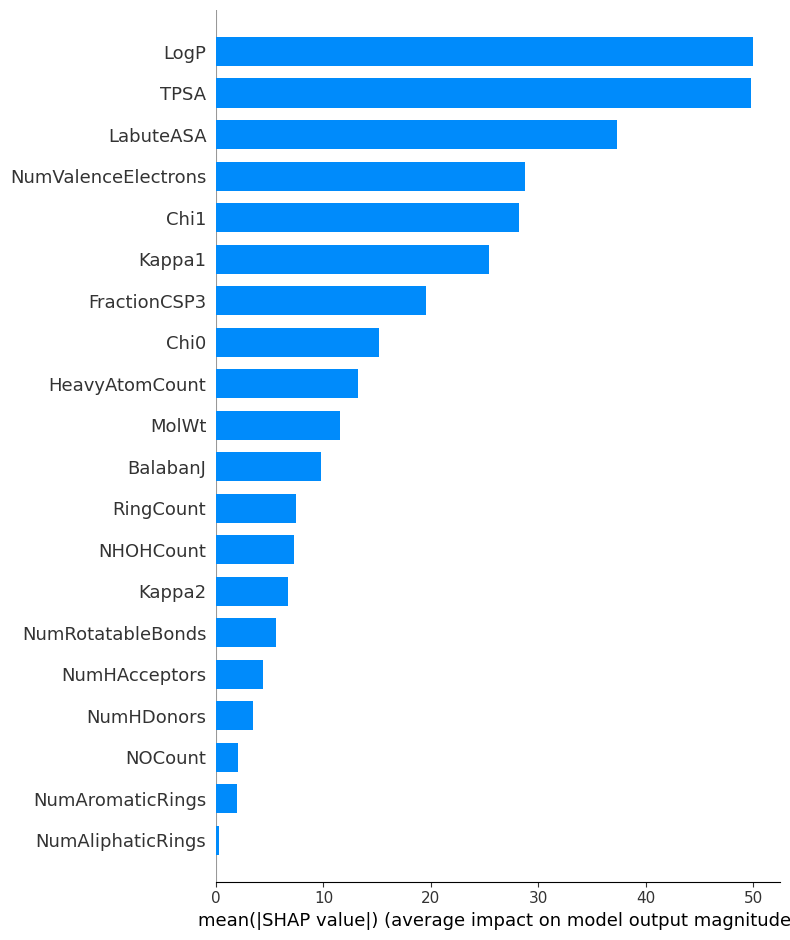

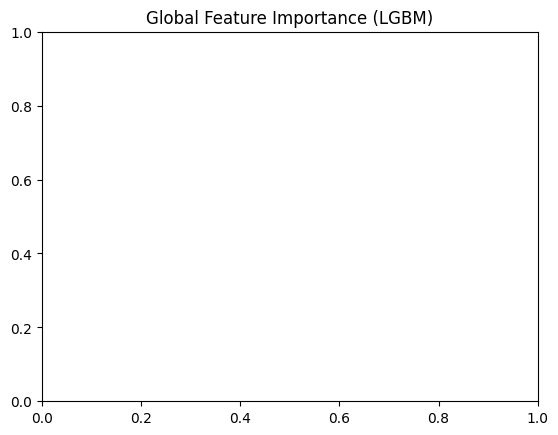

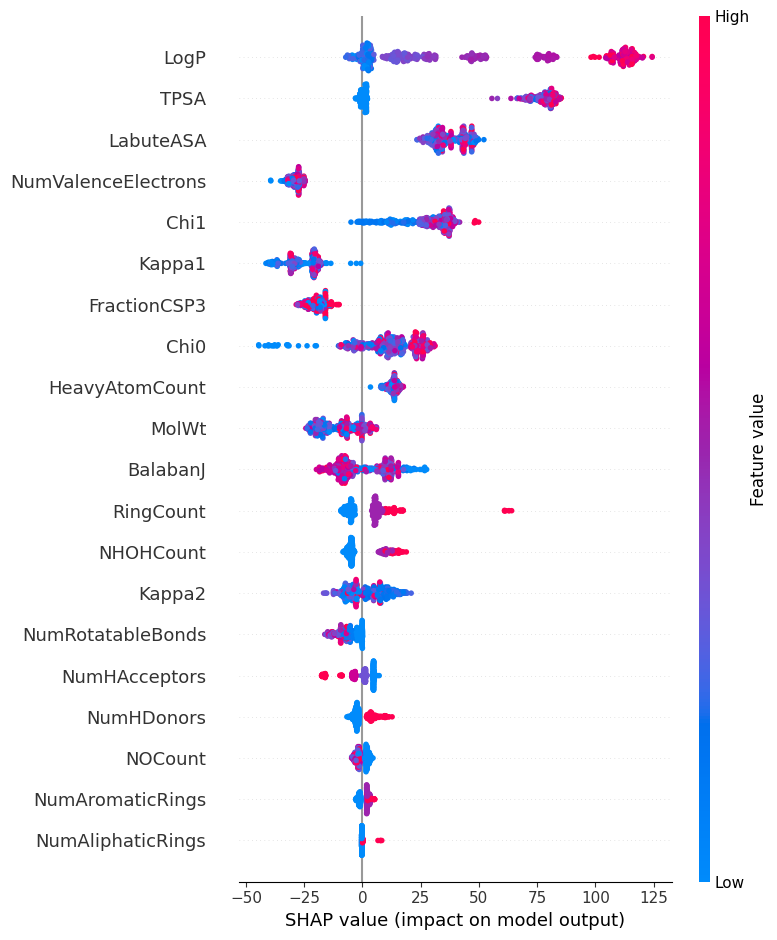

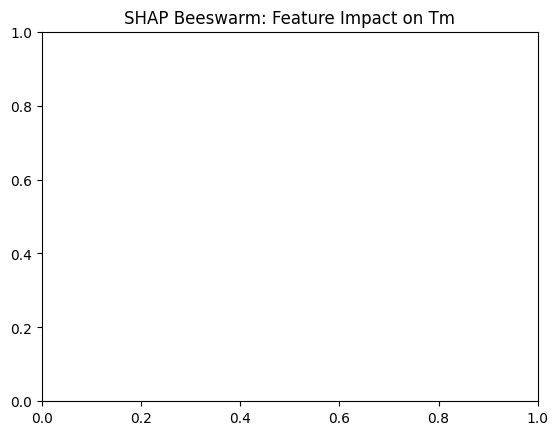

<Figure size 800x600 with 0 Axes>

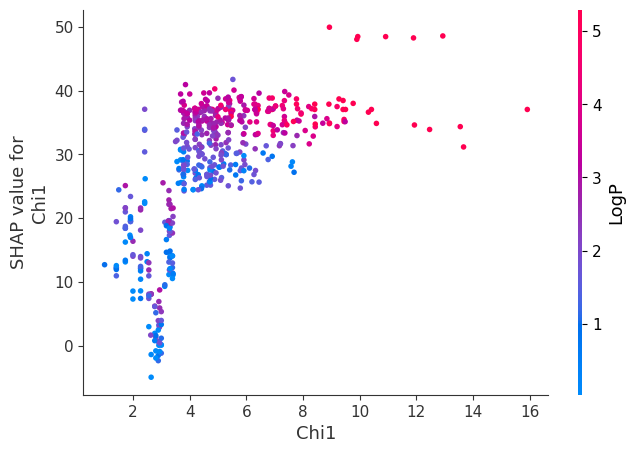

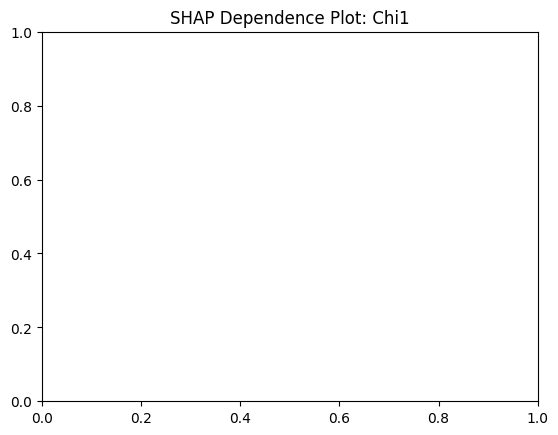

<Figure size 800x600 with 0 Axes>

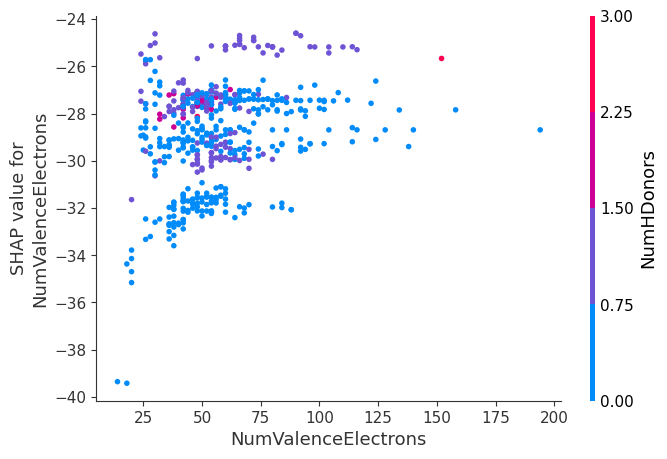

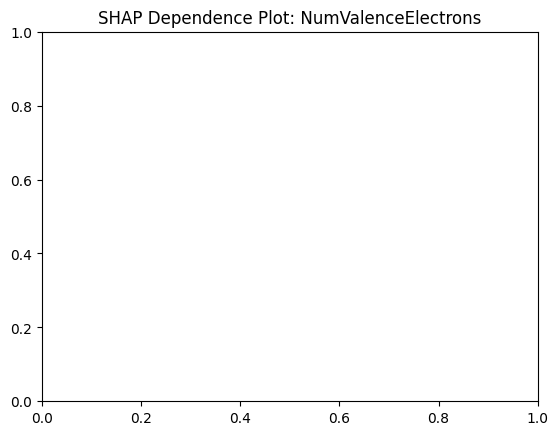

<Figure size 800x600 with 0 Axes>

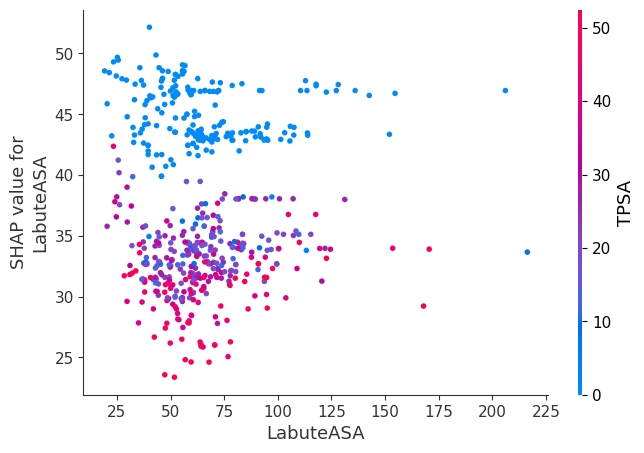

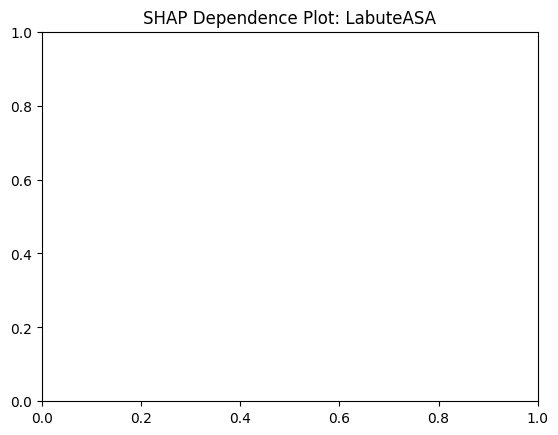

<Figure size 800x600 with 0 Axes>

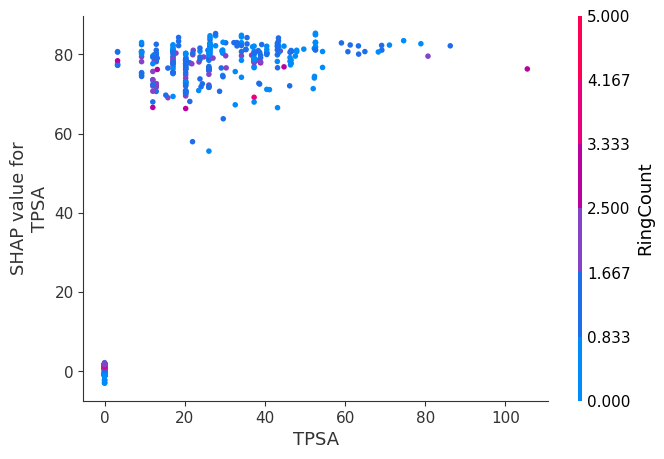

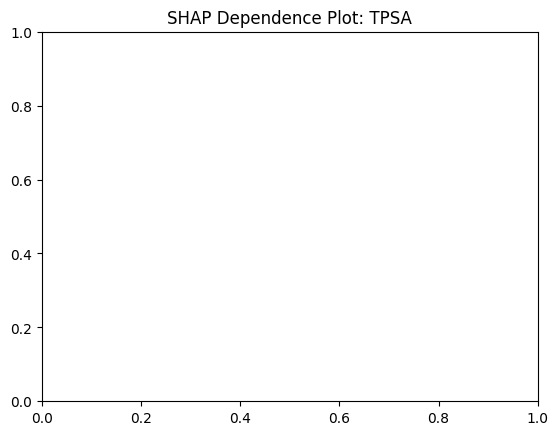

<Figure size 800x600 with 0 Axes>

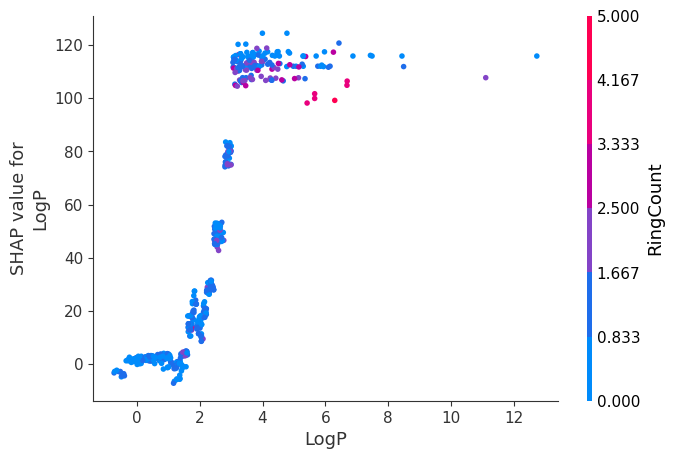

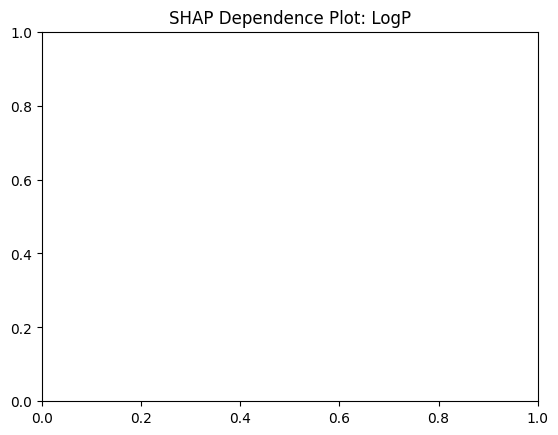

In [32]:
import shap
#Explaining the MetaClassifier LGBM as Main Model
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])


lgbm_model = lgbm.named_steps['model']


explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_test_numeric)


plt.figure(figsize=(10,8))
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar")
plt.title("Global Feature Importance (LGBM)")
plt.show()

plt.figure(figsize=(12,10))
shap.summary_plot(shap_values, X_test_numeric)
plt.title("SHAP Beeswarm: Feature Impact on Tm")
plt.show()

# Compute mean absolute SHAP value per feature
mean_shap = np.abs(shap_values).mean(axis=0)
top_features = X_test_numeric.columns[np.argsort(mean_shap)[-5:]]  # Top 5 features

for feature in top_features:
    plt.figure(figsize=(8,6))
    shap.dependence_plot(feature, shap_values, X_test_numeric)
    plt.title(f"SHAP Dependence Plot: {feature}")
    plt.show()

## Causal Inference

In [36]:
from causalml.inference.meta import LRSRegressor

# --- Numeric descriptors only ---
X_numeric = X_train.select_dtypes(include=[np.number])
y = y_train.values

# --- Simulate treatment (example: LogP high vs low) ---
T = (X_numeric['LogP'] > X_numeric['LogP'].median()).astype(int).values

# --- Fit meta-learner causal model ---
learner = LRSRegressor(control_name=0)  # no 'learner' argument
learner.fit(X_numeric.values, T, y)

# --- Predict individual treatment effects ---
te = learner.predict(X_numeric.values)
print("Sample Individual Treatment Effects:", te[:10])

# --- Compute Average Treatment Effect ---
ATE = te.mean()
print(f"Average Treatment Effect (LogP high vs low): {ATE:.2f}")

Sample Individual Treatment Effects: [[-2.46478868]
 [-2.46478868]
 [-2.46478868]
 [-2.46478868]
 [-2.46478868]
 [-2.46478868]
 [-2.46478868]
 [-2.46478868]
 [-2.46478868]
 [-2.46478868]]
Average Treatment Effect (LogP high vs low): -2.46


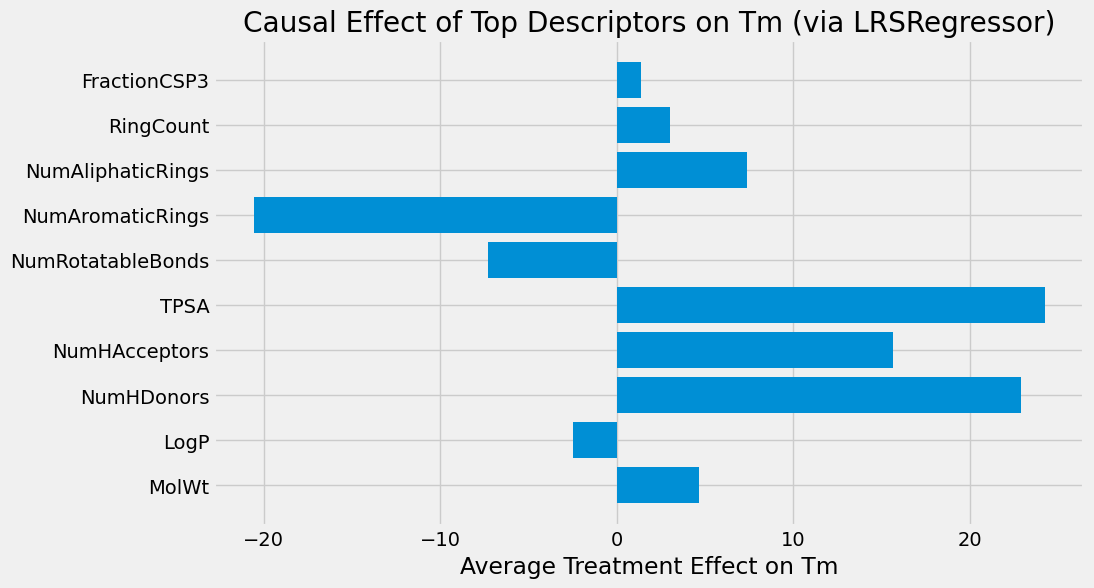

In [38]:
features = X_numeric.columns
ATE_dict = {}

# Loop through top features
for feature in features[:10]:  # top 10 for example
    # Define treatment: 1 if feature > median, else 0
    T = (X_numeric[feature] > X_numeric[feature].median()).astype(int).values

    # Initialize and fit meta-learner causal model
    learner = LRSRegressor(control_name=0)
    learner.fit(X_numeric.values, T, y_train.values)

    # Predict Individual Treatment Effects (ITE)
    te = learner.predict(X_numeric.values)

    # Store Average Treatment Effect (ATE)
    ATE_dict[feature] = te.mean()

# Plot the ATEs
plt.figure(figsize=(10,6))
plt.barh(list(ATE_dict.keys()), list(ATE_dict.values()))
plt.xlabel("Average Treatment Effect on Tm")
plt.title("Causal Effect of Top Descriptors on Tm (via LRSRegressor)")
plt.show()

## A/B Testing

In [39]:
from scipy.stats import ttest_ind

# Example feature
feature = "LogP"

# Group A: feature <= median
group_A = X_numeric[X_numeric[feature] <= X_numeric[feature].median()]
y_A = y_train.loc[group_A.index]

# Group B: feature > median
group_B = X_numeric[X_numeric[feature] > X_numeric[feature].median()]
y_B = y_train.loc[group_B.index]

In [40]:
stat, p_value = ttest_ind(y_A, y_B, equal_var=False)  # Welch's t-test
print(f"A/B Testing on {feature}: t-stat = {stat:.3f}, p-value = {p_value:.4f}")

A/B Testing on LogP: t-stat = -6.814, p-value = 0.0000


In [41]:
# Cohen's d
mean_diff = y_B.mean() - y_A.mean()
pooled_std = np.sqrt((y_A.std()**2 + y_B.std()**2)/2)
cohens_d = mean_diff / pooled_std
print(f"Cohen's d (effect size): {cohens_d:.3f}")


Cohen's d (effect size): 0.295


In [42]:
top_features = X_numeric.columns[:10]  # top 10 for example

for feature in top_features:
    group_A = X_numeric[X_numeric[feature] <= X_numeric[feature].median()]
    y_A = y_train.loc[group_A.index]
    group_B = X_numeric[X_numeric[feature] > X_numeric[feature].median()]
    y_B = y_train.loc[group_B.index]

    stat, p_value = ttest_ind(y_A, y_B, equal_var=False)
    mean_diff = y_B.mean() - y_A.mean()
    pooled_std = np.sqrt((y_A.std()**2 + y_B.std()**2)/2)
    cohens_d = mean_diff / pooled_std

    print(f"{feature}: t={stat:.2f}, p={p_value:.4f}, Cohen's d={cohens_d:.3f}")

MolWt: t=-19.67, p=0.0000, Cohen's d=0.853
LogP: t=-6.81, p=0.0000, Cohen's d=0.295
NumHDonors: t=-12.72, p=0.0000, Cohen's d=0.594
NumHAcceptors: t=-11.08, p=0.0000, Cohen's d=0.502
TPSA: t=-15.82, p=0.0000, Cohen's d=0.686
NumRotatableBonds: t=0.26, p=0.7978, Cohen's d=-0.011
NumAromaticRings: t=-21.62, p=0.0000, Cohen's d=0.931
NumAliphaticRings: t=-0.65, p=0.5142, Cohen's d=0.041
RingCount: t=-18.81, p=0.0000, Cohen's d=1.063
FractionCSP3: t=15.79, p=0.0000, Cohen's d=-0.690


RingCount and aromaticity dominate Tm — chemically very plausible.

MolWt and TPSA are secondary but significant predictors.

Flexible descriptors like NumRotatableBonds don’t really change Tm — nice sanity check.

FractionCSP3 is interesting — your model finds a negative effect, which could be a publishable insight.